<a href="https://colab.research.google.com/github/ZahraAlharz/Airbnb-Listing-EDA/blob/main/Airbnb_Listing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The strategy would be visualizing the data of in other words analyzing data by taking group of columns to make the analysis and cleaning them along the way.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240310234900,2024-03-10,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,...,4.92,4.82,4.81,NaN,f,1,0,1,0,1.94
1,2992450,https://www.airbnb.com/rooms/2992450,20240310234900,2024-03-11,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.08
2,3820211,https://www.airbnb.com/rooms/3820211,20240310234900,2024-03-11,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.80,4.82,4.78,NaN,f,4,4,0,0,2.51
3,5651579,https://www.airbnb.com/rooms/5651579,20240310234900,2024-03-11,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.79,4.64,NaN,f,2,1,1,0,3.13
4,6623339,https://www.airbnb.com/rooms/6623339,20240310234900,2024-03-11,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.68,4.81,4.72,NaN,f,4,4,0,0,2.87


Given that the data is large and there are many diminsions in it, so need to drop as many based on personal analysis

In [ ]:
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source','neighborhood_overview', 'picture_url', 'host_id',
                   'host_url', 'host_name','host_location', 'host_about','host_response_time', 'host_thumbnail_url', 'host_picture_url',
                   'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic',
                   'host_has_profile_pic', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms_text',
                   'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                   'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped',
                   'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'license',
                   'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.columns
#df.columns.isnull().sum()

Index(['name', 'description', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [ ]:
#df['review_scores_location'].unique()
df['review_scores_location'].isnull().sum()
#given that 42 is a high number so we gonna have to impute it by the mean
df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].mean())
#now it is zero
df['review_scores_location'].isnull().sum()

0

In [ ]:
df['neighbourhood_cleansed'].unique()
#no null values
df['neighbourhood_cleansed'].isnull().sum()

0

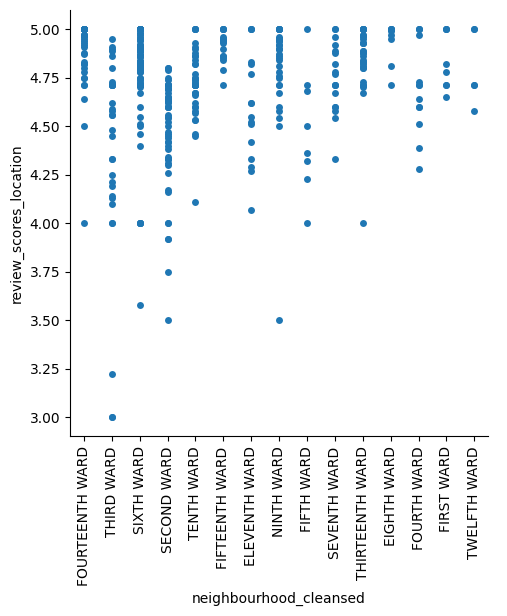

In [ ]:
graph = sns.catplot(data=df, x='neighbourhood_cleansed', y='review_scores_location', jitter=False)
graph.set_xticklabels(rotation=90)
plt.show()

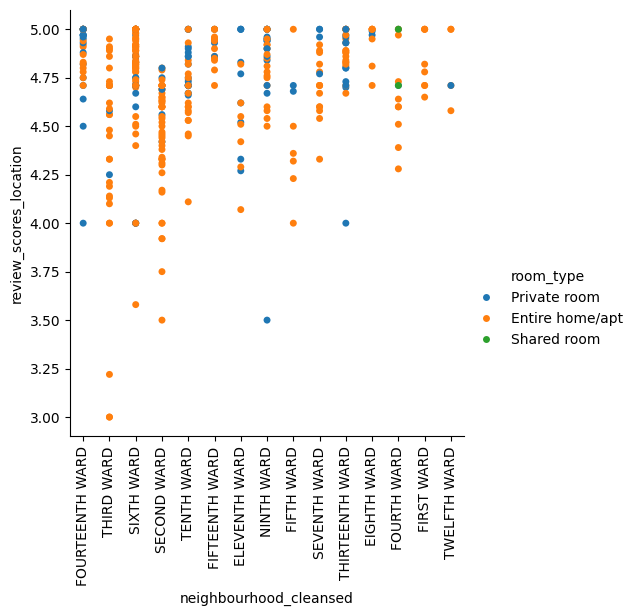

In [ ]:
graph = sns.catplot(data=df, hue='room_type', x='neighbourhood_cleansed', y='review_scores_location', jitter=False)
graph.set_xticklabels(rotation=90)
plt.show()

In [ ]:
df['host_is_superhost']= df['host_is_superhost'].fillna(df['host_is_superhost'].mode())

Will perform hot encoding on host_is_superhost to convert into numeric

In [ ]:
df['host_is_superhost'] = pd.factorize(df['host_is_superhost'])[0]
df['host_is_superhost']


0      0
1      0
2      0
3      0
4      0
      ..
399    1
400    1
401    1
402    1
403    1
Name: host_is_superhost, Length: 404, dtype: int64

In [ ]:
df['host_since'] = pd.DatetimeIndex(df['host_since']).year

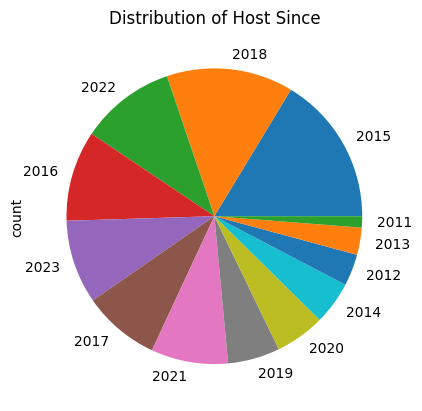

In [ ]:


# Count the occurrences of each 'host_since' value
counts = df['host_since'].value_counts()

# Plot the pie chart
counts.plot(kind='pie')

# Add labels and title
plt.title('Distribution of Host Since')

# Display the chart
plt.show()

In [ ]:
df['price'].isnull().sum()

54

In [ ]:
df['maximum_nights'].unique()

array([1125,   45,    2,   65,  365, 1124,  730,   28,  180,   15,   27,
         26,   14,  700,  800,    7,   29, 1080,    5,  100,   32,    3,
        150,    1,   60,  183,   61,   31,  366,   90,   21,   30,  130,
         10,  115,   91,    4,   40,  220,   89])

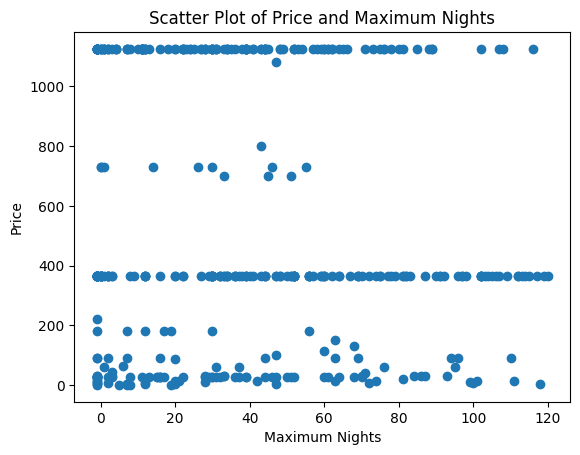

In [ ]:
df['price'] = pd.factorize(df['price'])[0]
plt.scatter(df['price'], df['maximum_nights'])

# Set labels and title
plt.xlabel('Maximum Nights')
plt.ylabel('Price')
plt.title('Scatter Plot of Price and Maximum Nights')

# Display the scatter plot
plt.show()

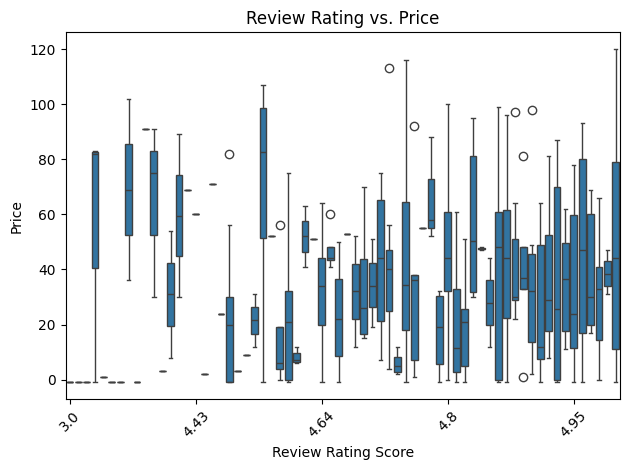

In [ ]:
sns.boxplot(data=df, x='review_scores_rating', y='price')

plt.xlabel('Review Rating Score')
plt.ylabel('Price')
plt.title('Review Rating vs. Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))


plt.tight_layout()
plt.show()

In [ ]:
df['minimum_nights'].isnull().sum()

0

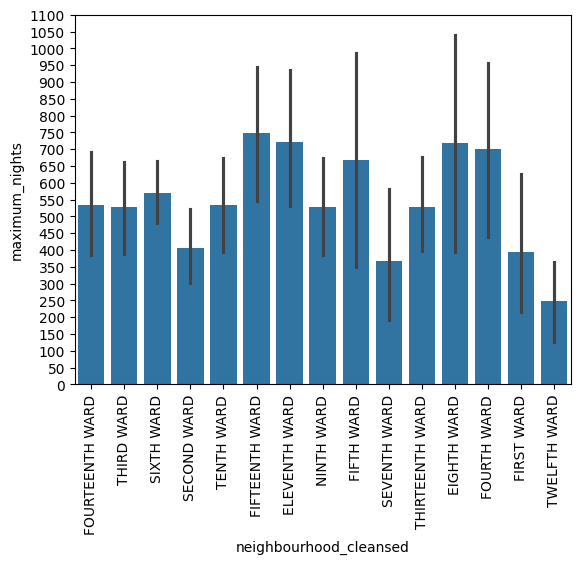

In [ ]:
graph=sns.barplot(data=df, x='neighbourhood_cleansed', y='maximum_nights')
plt.xticks(rotation=90)  # Set x-axis tick marks with a step of 200
plt.yticks(range(0, 1125, 50))  # Set y-axis tick marks with a step of 200
plt.show()

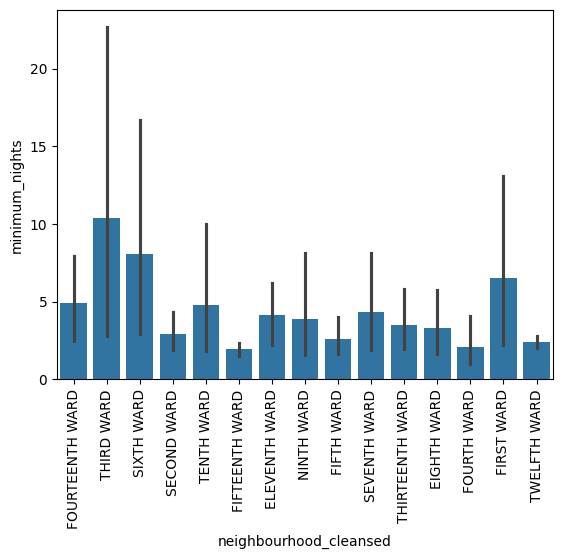

In [ ]:
graph=sns.barplot(data=df, x='neighbourhood_cleansed', y='minimum_nights')
plt.xticks(rotation=90)
plt.show()

<ipython-input-20-4cd0a359819d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  # Rotate x-axis labels if needed
<ipython-input-20-4cd0a359819d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)  # Rotate x-axis labels if needed


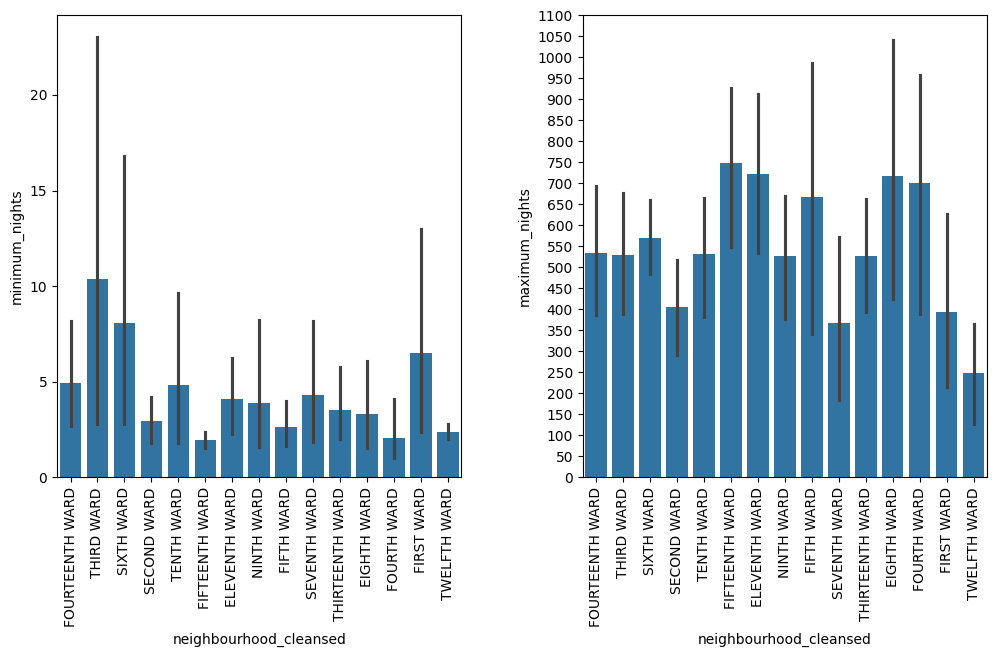

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.barplot(data=df, x='neighbourhood_cleansed', y='minimum_nights', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  # Rotate x-axis labels if needed

sns.barplot(data=df, x='neighbourhood_cleansed', y='maximum_nights', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)  # Rotate x-axis labels if needed
ax2.set_yticks(range(0, 1125, 50))  # Set y-axis tick marks with a step of 50

plt.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
df.head()
#df.columns.isnull().sum()

,name,description,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",2013,100%,87%,0,"['email', 'phone']",t,"Albany, New York, United States",FOURTEENTH WARD,...,248,4.75,4.83,4.57,4.92,4.92,4.82,4.81,f,1.94
1,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,2013,100%,100%,0,"['email', 'phone']",f,NaN,THIRD WARD,...,9,3.56,3.44,3.56,4.22,4.56,3.22,3.67,f,0.08
2,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...",2014,100%,66%,0,"['email', 'phone']",t,"Albany, New York, United States",SIXTH WARD,...,292,4.74,4.89,4.87,4.86,4.80,4.82,4.78,f,2.51
3,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",2015,100%,99%,0,"['email', 'phone', 'work_email']",t,"Albany, New York, United States",SECOND WARD,...,337,4.51,4.61,4.45,4.82,4.87,4.79,4.64,f,3.13
4,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,2014,100%,66%,0,"['email', 'phone']",t,"Albany, New York, United States",SIXTH WARD,...,306,4.73,4.83,4.71,4.83,4.68,4.81,4.72,f,2.87


from matplotlib import pyplot as plt
_df_0['host_since'].plot(kind='hist', bins=20, title='host_since')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['accommodates'].plot(kind='hist', bins=20, title='accommodates')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['beds'].plot(kind='hist', bins=20, title='beds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('host_acceptance_rate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('host_verifications').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='host_since', y='accommodates', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='accommodates', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='bedrooms', y='beds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='beds', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['host_is_superhost']
  ys = series['host_since']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('host_is_superhost', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('host_is_superhost')
_ = plt.ylabel('host_since')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['host_is_superhost']
  ys = series['host_since']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('host_is_superhost', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('description')):
  _plot_series(series, series_name, i)
  fig.legend(title='description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('host_is_superhost')
_ = plt.ylabel('host_since')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['host_is_superhost']
  ys = series['host_since']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('host_is_superhost', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('host_acceptance_rate')):
  _plot_series(series, series_name, i)
  fig.legend(title='host_acceptance_rate', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('host_is_superhost')
_ = plt.ylabel('host_since')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['host_is_superhost']
  ys = series['host_since']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('host_is_superhost', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('host_verifications')):
  _plot_series(series, series_name, i)
  fig.legend(title='host_verifications', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('host_is_superhost')
_ = plt.ylabel('host_since')

from matplotlib import pyplot as plt
_df_16['host_since'].plot(kind='line', figsize=(8, 4), title='host_since')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['accommodates'].plot(kind='line', figsize=(8, 4), title='accommodates')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['beds'].plot(kind='line', figsize=(8, 4), title='beds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['description'].value_counts()
    for x_label, grp in _df_20.groupby('name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('name')
_ = plt.ylabel('description')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['host_acceptance_rate'].value_counts()
    for x_label, grp in _df_21.groupby('description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('description')
_ = plt.ylabel('host_acceptance_rate')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['host_verifications'].value_counts()
    for x_label, grp in _df_22.groupby('host_acceptance_rate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('host_acceptance_rate')
_ = plt.ylabel('host_verifications')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['host_identity_verified'].value_counts()
    for x_label, grp in _df_23.groupby('host_verifications')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('host_verifications')
_ = plt.ylabel('host_identity_verified')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='host_since', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='host_since', y='description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['host_acceptance_rate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='host_since', y='host_acceptance_rate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['host_verifications'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='host_since', y='host_verifications', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)